In [ ]:
# Import necessary libraries for data processing, visualization, and natural language processing (NLP).
# pandas: for handling and analyzing data
# matplotlib: for visualizing data (used for plotting graphs)
# nltk: for natural language processing tasks
# stopwords: part of NLTK, used to filter out common words like 'the', 'is', etc., that don't add value in text analysis
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [ ]:
# Read the 'Movie_Review.csv' file into a pandas DataFrame for further analysis
# This file contains movie reviews and their associated sentiment labels (positive/negative)
data = pd.read_csv('Movie_Review.csv')

In [ ]:
# Remove any rows with missing or null values from the DataFrame to ensure clean data for analysis
# The 'inplace=True' argument modifies the original DataFrame directly
data.dropna(inplace=True)

In [ ]:
# Define a function 'clean_review' to remove common stopwords (e.g., 'the', 'is', 'and') from the review text
# The function splits the review into individual words, filters out stopwords, and then joins the remaining words back into a string
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [ ]:
# Apply the 'clean_review' function to each review in the 'text' column of the DataFrame
# This will clean the reviews by removing stopwords from all the entries in the 'text' column
data['text'] = data['text'].apply(clean_review)

In [6]:
#wordcloud 

from wordcloud import WordCloud

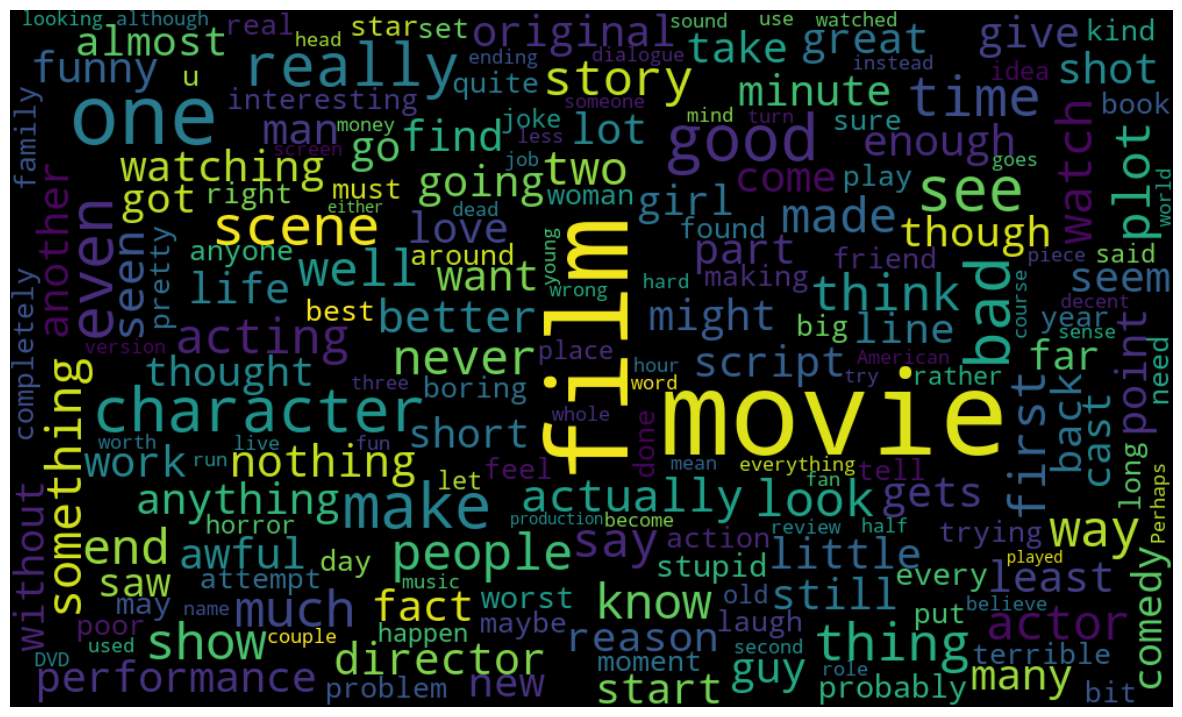

In [ ]:
# Extract all the negative sentiment reviews from the 'text' column and join them into a single string
# The reviews with negative sentiment ('sentiment' == 'neg') are selected and concatenated for word cloud generation
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))

# Create a WordCloud object to visualize the most frequent words in negative reviews
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)

# Set up the plot for the word cloud with a specific figure size
plt.figure(figsize=(15, 12))

# Generate and display the word cloud image based on the negative reviews
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')

# Turn off axis labels and ticks for better visualization
plt.axis('off')

# Show the word cloud plot
plt.show()


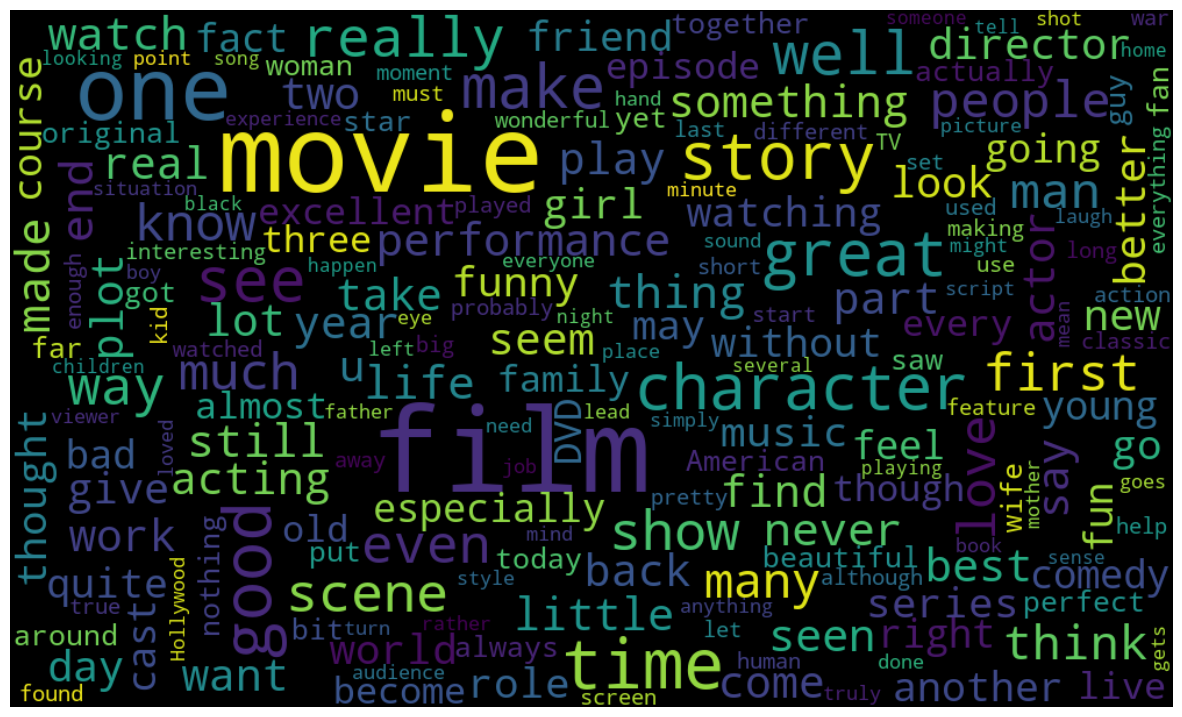

In [ ]:
#Wordcloud for positive
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Import the TfidfVectorizer from scikit-learn to convert text data into numerical features (TF-IDF values)
# 'max_features=2500' limits the number of features to the top 2500 most important words in the text
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [ ]:
# Convert the text data into numerical features using TF-IDF vectorization
# 'fit_transform' learns the vocabulary and transforms the text into a matrix of TF-IDF features
# The resulting matrix is then converted into a NumPy array
reviews = cv.fit_transform(data['text']).toarray()

In [ ]:
# Convert sentiment labels ('pos' and 'neg') into numeric values (1 for positive, 0 for negative)
# This is done to prepare the data for machine learning models, which require numerical inputs
data['sentiment'] = data['sentiment'].replace(['pos', 'neg'], [1, 0])

/var/folders/yr/4n4hqyz91_562b_4vwqblfr00000gn/T/ipykernel_2900/3769914066.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


In [ ]:
# Count the number of occurrences of each sentiment label (1 for positive, 0 for negative)
# This helps in understanding the distribution of sentiment labels in the dataset
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [ ]:
# Import the LogisticRegression class from scikit-learn, which will be used to build a classification model
# Logistic Regression is a simple and widely used algorithm for binary classification problems
from sklearn.linear_model import LogisticRegression

In [ ]:
# Instantiate the LogisticRegression model object, which will be trained on the input features to make predictions
# This model will be used to classify reviews as either positive or negative based on the training data
model = LogisticRegression()

In [ ]:
# Import the train_test_split function from scikit-learn, which is used to split the dataset into training and testing sets
# This helps evaluate the performance of the model on unseen data by training on one portion and testing on another
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into training and testing sets using the train_test_split function
# 'reviews' contains the feature data (text), and 'data['sentiment']' contains the target labels (sentiment)
# 80% of the data will be used for training, and 20% will be used for testing the model
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [ ]:
# Train the Logistic Regression model using the training data (reviews_train) and corresponding labels (sent_train)
# The model learns the relationship between the input text and the sentiment label during this step
model.fit(reviews_train, sent_train)

LogisticRegression()

In [ ]:
# Use the trained Logistic Regression model to make predictions on the test data (reviews_test)
# The model predicts the sentiment (positive or negative) for each review in the test set
predict = model.predict(reviews_test)

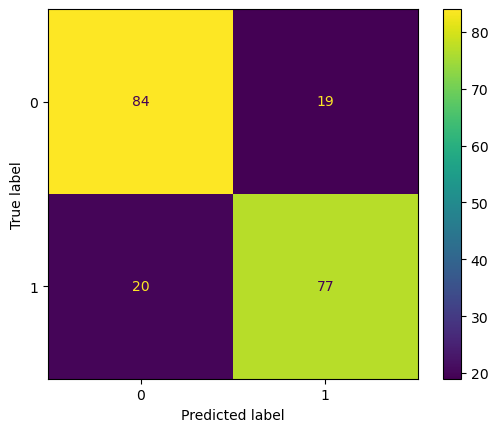

In [ ]:
# Import confusion_matrix and ConfusionMatrixDisplay from sklearn.metrics to evaluate and visualize model performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix comparing actual (sent_test) vs predicted (predict) sentiment labels
cm = confusion_matrix(sent_test, predict, labels=model.classes_)

# Prepare the confusion matrix for visualization with appropriate display labels
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
display.plot()

# Display the confusion matrix plot for evaluation
plt.show()


In [ ]:
# Import the pickle module as pk to serialize and deserialize Python objects, allowing saving/loading models
import pickle as pk

In [ ]:
# Serialize the trained model and save it to a file named 'model.pkl' in write-binary mode ('wb')
pk.dump(model, open('model.pkl', 'wb'))

In [ ]:
# Serialize the TfidfVectorizer object (cv) and save it to a file named 'scaler.pkl' in write-binary mode ('wb')
pk.dump(cv, open('scaler.pkl', 'wb'))